# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
test = weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

units = "metric"
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | sinabang
Processing Record 4 of Set 1 | severo-yeniseyskiy
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | corumba
Processing Record 7 of Set 1 | ilgaz
Processing Record 8 of Set 1 | frondenberg
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | ciudad de chiautla de tapia
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | fort bragg
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | chilmari
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | susuman
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,28.39,83,40,5.14,MP,1729306571
1,waitangi,-43.9535,-176.5597,12.68,91,4,2.24,NZ,1729306572
2,sinabang,2.4803,96.3801,28.92,70,41,2.01,ID,1729306573
3,severo-yeniseyskiy,60.3725,93.0408,-5.04,93,98,1.67,RU,1729306574
4,bethel,41.3712,-73.4140,10.12,72,0,0.00,US,1729306576


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,28.39,83,40,5.14,MP,1729306571
1,waitangi,-43.9535,-176.5597,12.68,91,4,2.24,NZ,1729306572
2,sinabang,2.4803,96.3801,28.92,70,41,2.01,ID,1729306573
3,severo-yeniseyskiy,60.3725,93.0408,-5.04,93,98,1.67,RU,1729306574
4,bethel,41.3712,-73.4140,10.12,72,0,0.00,US,1729306576


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

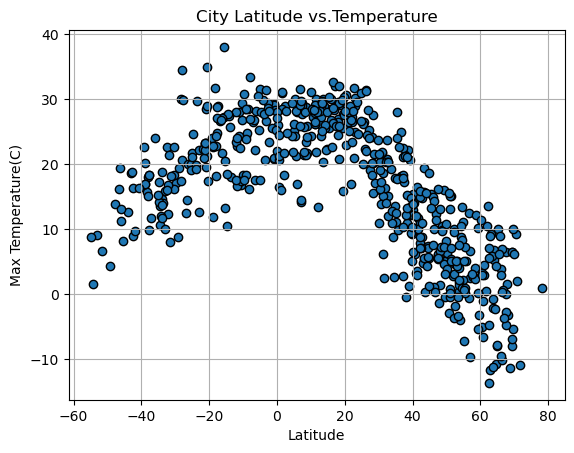

In [8]:
# Create the output directory if it doesn't exist
output_dir = "../output_data"
os.makedirs(output_dir, exist_ok=True)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature')
plt.grid()

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

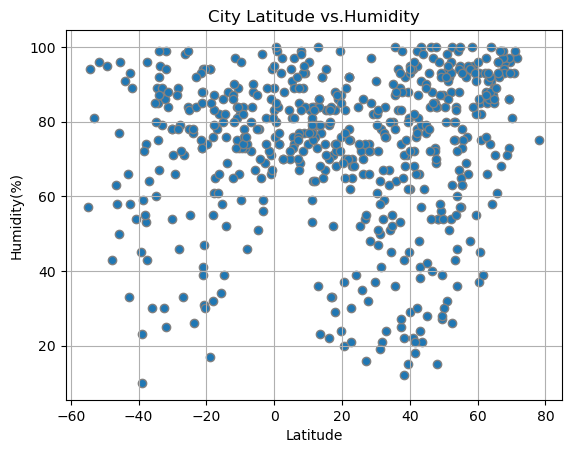

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

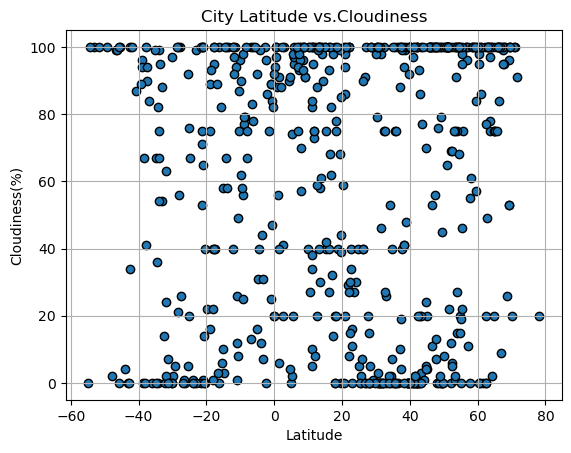

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

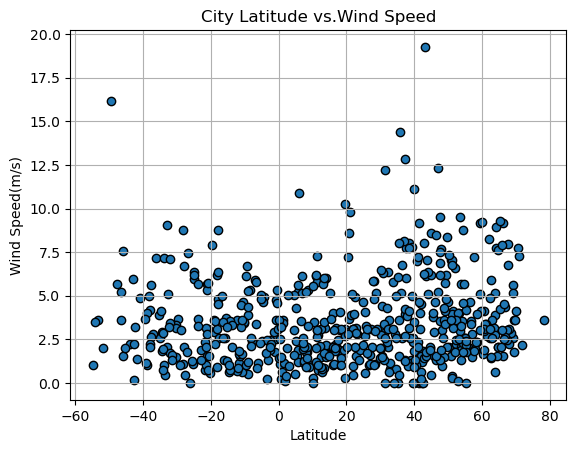

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,28.39,83,40,5.14,MP,1729306571
2,sinabang,2.4803,96.3801,28.92,70,41,2.01,ID,1729306573
3,severo-yeniseyskiy,60.3725,93.0408,-5.04,93,98,1.67,RU,1729306574
4,bethel,41.3712,-73.4140,10.12,72,0,0.00,US,1729306576
6,ilgaz,40.9251,33.6259,3.27,94,97,1.71,TR,1729306518


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,12.68,91,4,2.24,NZ,1729306572
5,corumba,-19.0092,-57.6533,22.63,94,89,2.94,BR,1729306577
9,punta arenas,-53.1500,-70.9167,9.06,81,100,3.60,CL,1729306506
12,puerto natales,-51.7236,-72.4875,6.63,96,100,2.03,CL,1729306585
15,adamstown,-25.0660,-130.1015,21.64,78,76,6.38,PN,1729306589


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temp(C)')

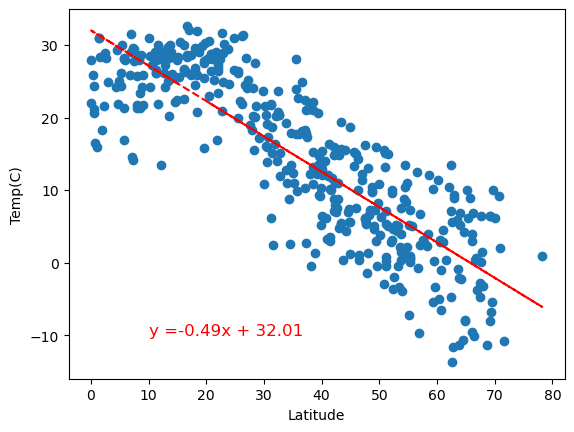

In [15]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')

The r-value between Lat and Max Temp is 0.67


Text(0, 0.5, 'Temp(C)')

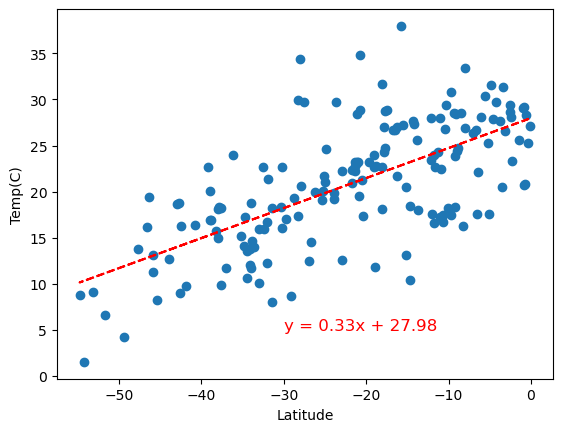

In [16]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.07


Text(0, 0.5, 'Humidity(%)')

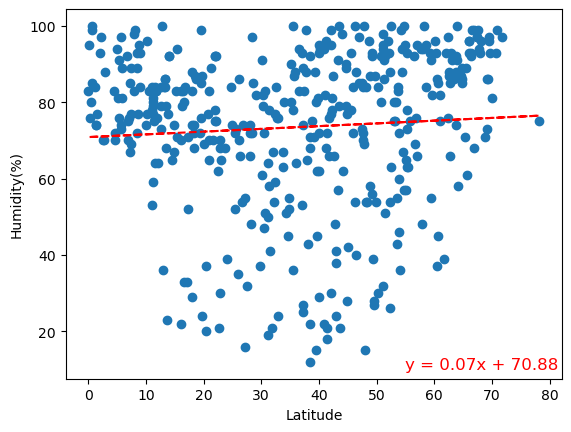

In [17]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.11


Text(0, 0.5, 'Humidity(%)')

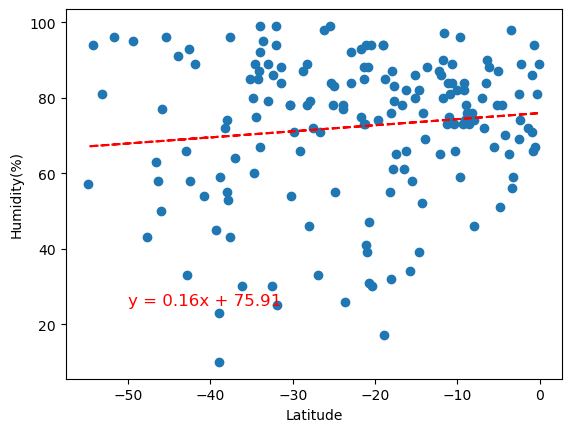

In [18]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.02


Text(0, 0.5, 'Cloudiness(%)')

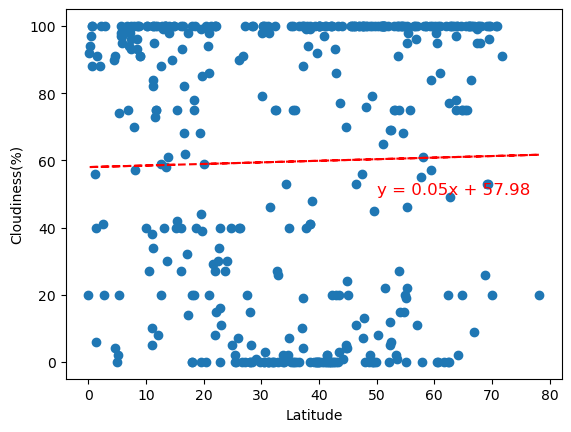

In [19]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.06


Text(0, 0.5, 'Cloudiness(%)')

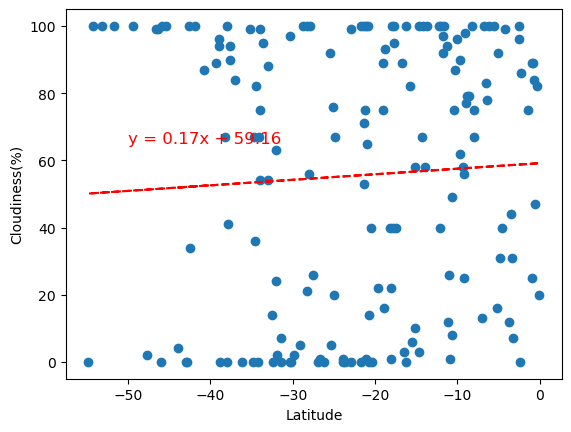

In [20]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.19


Text(0, 0.5, 'Wind Speed(m/s)')

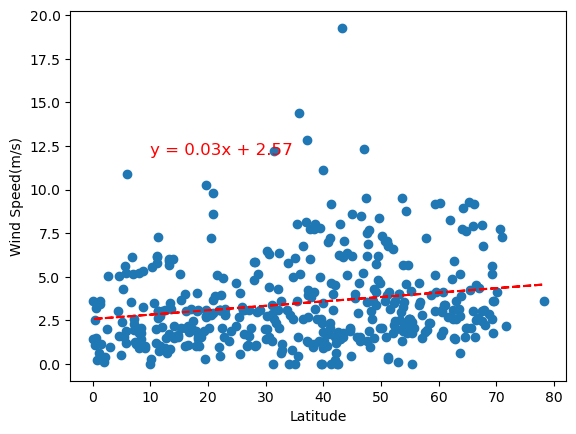

In [21]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.11


Text(0, 0.5, 'Wind Speed(m/s)')

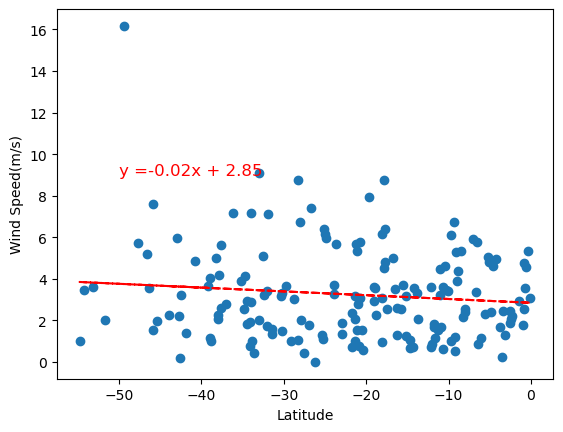

In [22]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
The wind speeds are averaged across all latitudes of the northern and southern hemispheres. But was it interesting
is that there are a few outlyiers of greater speeds the further you get from 0 degrees or the equator.



SyntaxError: invalid syntax (82943846.py, line 1)